### 1. Classes and Objects

**Class:** A class is a blueprint or a template for creating objects. It defines a set of attributes (data) and methods (functions) that the created objects will have. Think of it like a cookie cutter.

**Object:** An object is an instance of a class. It's a concrete entity created from the class blueprint. Each object can have its own unique set of attribute values. Think of it like an actual cookie made from the cookie cutter.

In [4]:
class Dog:
    # The __init__ method is the "constructor"
    # It sets up the initial attributes of the object
    def __init__(self, name, breed):
        self.name = name   # Attribute
        self.breed = breed # Attribute

    def bark(self):       # Method (Function inside a class)
        return f"{self.name} says Woof!"

# Creating an object (Instance)
my_dog = Dog("Buddy", "Golden Retriever")
print(my_dog.bark())

Buddy says Woof!


In this example:
- `Dog` is the **class**.
- `my_dog` are **objects** (instances) of the `Dog` class.
- `name` and `breed` are **instance attributes** (unique to each dog object).
- `bark` is an **instance method** (an action a dog object can perform).

### 2. Inheritance

**Inheritance** is a mechanism that allows a new class (called a **child class** or **subclass**) to inherit properties (attributes and methods) from an existing class (called a **parent class** or **superclass**).

This promotes code reusability and establishes an "is-a" relationship between classes. For example, a "Labrador is a Dog."

The child class can:
- Use the attributes and methods of the parent class.
- Add new attributes and methods of its own.
- Override (modify) attributes and methods from the parent class.

In [6]:
class Animal:
    def __init__(self, name):
        self.name = name

    def speak(self):
        return f"{self.name} makes a sound"

class Dog(Animal):
    # Dog inherits from Animal
    def __init__(self, name, breed):
        super().__init__(name) # Call the parent class's constructor
        self.breed = breed

    def bark(self):
        return f"{self.name} says Woof!"

    # Overriding the speak method from Animal
    def speak(self):
        return self.bark() # A dog's sound is a bark

class Cat(Animal):
    # Cat also inherits from Animal
    def __init__(self, name, color):
        super().__init__(name)
        self.color = color

    def meow(self):
        return f"{self.name} says Meow!"

    # Overriding the speak method from Animal
    def speak(self):
        return self.meow()

# Creating objects
my_dog = Dog("Buddy", "Golden Retriever")
my_cat = Cat("Whiskers", "Ginger")

# Demonstrating inherited and unique behaviors
print(f"Dog: {my_dog.name}, Breed: {my_dog.breed}")
print(my_dog.speak()) # Calls the overridden speak method (which calls bark)
print(my_dog.bark()) # Dog's specific method

print(f"Cat: {my_cat.name}, Color: {my_cat.color}")
print(my_cat.speak()) # Calls the overridden speak method (which calls meow)
print(my_cat.meow()) # Cat's specific method

# An object of the base class
animal = Animal("Generic Animal")
print(animal.speak())

Dog: Buddy, Breed: Golden Retriever
Buddy says Woof!
Buddy says Woof!
Cat: Whiskers, Color: Ginger
Whiskers says Meow!
Whiskers says Meow!
Generic Animal makes a sound


In this example:
- `Animal` is the **parent class** (or base class) with a `name` attribute and a `speak` method.
- `Dog` and `Cat` are **child classes** (or subclasses) that inherit from `Animal`.
- `Dog` and `Cat` use `super().__init__(name)` to call the parent class's constructor to initialize the `name` attribute.
- Both `Dog` and `Cat` add their own unique attributes (`breed` and `color` respectively).
- They also add their own specific methods (`bark` and `meow`).
- Crucially, they **override** the `speak` method from `Animal` to provide their specific sounds, demonstrating how subclasses can customize inherited behavior.

### 3. Polymorphism

**Polymorphism** means "many forms." In Object-Oriented Programming, it refers to the ability of different objects to respond to the same method call in their own specific ways. This is often achieved through inheritance and method overriding.

Think of it as having a common action (like `speak()`), but different objects (like a `Dog` or a `Cat`) performing that action in a way that is appropriate for them.

Key aspects:
- **Method Overriding:** A subclass provides its own implementation of a method that is already defined in its superclass.
- **Common Interface:** Objects of different classes can be treated through a common interface (e.g., calling `speak()` on an `Animal` object, even if it's actually a `Dog` or a `Cat`).

In [7]:
# We'll use our existing Animal, Dog, and Cat classes to demonstrate polymorphism

# The Animal, Dog, and Cat classes are already defined and executed from the previous step
# If you run this cell independently, ensure the previous classes are defined or copied here.

# Function that takes an Animal object (or any object that has a 'speak' method)
def make_animal_speak(animal):
    print(f"The animal says: {animal.speak()}")

# Creating objects
my_dog = Dog("Buddy", "Golden Retriever")
my_cat = Cat("Whiskers", "Ginger")
animal = Animal("Generic Animal")

# Demonstrating polymorphism
make_animal_speak(my_dog)    # Dog's speak() (which calls bark()) is invoked
make_animal_speak(my_cat)    # Cat's speak() (which calls meow()) is invoked
make_animal_speak(animal)  # Animal's original speak() is invoked

# Another example: a list of various animal objects
animals = [Dog("Max", "Labrador"), Cat("Bella", "White"), Animal("Wild Creature")]

print("\nIterating through a list of diverse animals:")
for a in animals:
    make_animal_speak(a)


The animal says: Buddy says Woof!
The animal says: Whiskers says Meow!
The animal says: Generic Animal makes a sound

Iterating through a list of diverse animals:
The animal says: Max says Woof!
The animal says: Bella says Meow!
The animal says: Wild Creature makes a sound


In this example:
- We have a base class `Animal` with a `speak` method.
- Both `Dog` and `Cat` classes inherit from `Animal` and **override** the `speak` method to provide their specific sounds (`bark` and `meow` respectively).
- The `make_animal_speak` function doesn't care if it's given a `Dog`, a `Cat`, or a generic `Animal` object. It simply calls the `speak()` method on whatever object it receives.
- This is polymorphism in action: the *same method call* (`animal.speak()`) produces *different results* depending on the *type of object* it's called on. The function can interact with objects of different types through a common interface, without needing to know their specific types beforehand.

### 4. Encapsulation

**Encapsulation** is the bundling of data (attributes) and methods (functions) that operate on the data into a single unit, or class. It restricts direct access to some of an object's components, which means that the internal representation of an object is hidden from the outside. Only the object itself can directly access its internal state.

This is typically achieved using access modifiers or conventions:
- **Public:** Attributes and methods are accessible from anywhere. (Default in Python).
- **Protected:** Attributes and methods are intended for internal use within the class or by its subclasses. In Python, this is indicated by a single leading underscore (e.g., `_protected_attribute`). It's a convention, not a strict enforcement.
- **Private:** Attributes and methods are intended to be strictly internal to the class. In Python, this is indicated by a double leading underscore (e.g., `__private_attribute`). Python performs "name mangling" to make these attributes harder to access directly from outside the class, but they are not truly private.

**Benefits of Encapsulation:**
- **Data Hiding:** Prevents direct access and modification of internal data, reducing unintended side effects.
- **Control:** Allows controlled access to data through methods (getters and setters), enabling validation or additional logic.
- **Flexibility:** Allows changes to the internal implementation of a class without affecting external code that uses the class.

In [8]:
class BankAccount:
    def __init__(self, owner, initial_balance=0):
        self.owner = owner          # Public attribute
        self._account_number = "123456789" # Protected attribute (by convention)
        self.__balance = initial_balance # Private attribute (name mangled)

    def deposit(self, amount):
        if amount > 0:
            self.__balance += amount
            print(f"Deposited ${amount}. New balance: ${self.__balance}")
        else:
            print("Deposit amount must be positive.")

    def withdraw(self, amount):
        if 0 < amount <= self.__balance:
            self.__balance -= amount
            print(f"Withdrew ${amount}. New balance: ${self.__balance}")
        else:
            print("Invalid withdrawal amount or insufficient balance.")

    def get_balance(self): # Public method to access private balance
        return self.__balance

    def _get_account_details(self): # Protected method
        return f"Owner: {self.owner}, Account No: {self._account_number}, Balance: {self.__balance}"

# Creating an object
my_account = BankAccount("Alice", 100)

# Accessing public attribute
print(f"Account owner: {my_account.owner}")

# Attempting to access protected attribute (by convention)
# This works, but it's a signal to developers not to directly access it.
print(f"Protected account number: {my_account._account_number}")

# Attempting to access private attribute directly (will raise AttributeError if strictly private, but Python does name mangling)
# print(my_account.__balance) # This will generally not work as expected

# Accessing private attribute indirectly via a public method (getter)
print(f"Current balance: ${my_account.get_balance()}")

# Using methods to modify the balance
my_account.deposit(50)
my_account.withdraw(30)
my_account.withdraw(200) # Invalid withdrawal

print(f"Final balance: ${my_account.get_balance()}")

# Accessing the protected method
print(my_account._get_account_details())

# Demonstrating name mangling for __balance
# You can still access it if you know the mangled name, but it's discouraged.
# print(my_account._BankAccount__balance)


Account owner: Alice
Protected account number: 123456789
Current balance: $100
Deposited $50. New balance: $150
Withdrew $30. New balance: $120
Invalid withdrawal amount or insufficient balance.
Final balance: $120
Owner: Alice, Account No: 123456789, Balance: 120


In this example:
- `owner` is a **public attribute**, accessible and modifiable directly.
- `_account_number` is a **protected attribute** (by convention). While technically accessible, the leading underscore signals that it's meant for internal use or subclasses.
- `__balance` is a **private attribute**. Python 'mangles' its name (e.g., `_BankAccount__balance`) to make it harder to access directly from outside the class, enforcing a stronger level of encapsulation. You should use the `deposit`, `withdraw`, and `get_balance` methods to interact with it.
- Methods like `deposit`, `withdraw`, and `get_balance` provide a controlled interface for interacting with the `__balance` (the encapsulated data), ensuring that operations on the balance adhere to defined rules (e.g., positive deposits, sufficient funds for withdrawals).

### 5. Abstraction and Abstract Base Classes (ABCs)

**Abstraction** in OOP focuses on showing only essential information and hiding complex implementation details. It allows you to model real-world entities in your code by creating a generalized concept rather than a concrete instance.

Think of it this way: when you drive a car, you use the steering wheel, accelerator, and brake. You don't need to know the intricate details of how the engine works or how the braking system operates. The car *abstracts* away those complexities, providing you with a simple interface.

In Python, abstraction is primarily achieved using **Abstract Base Classes (ABCs)** from the `abc` module. An ABC is a class that cannot be instantiated on its own but defines a common interface (a set of abstract methods) that its subclasses *must* implement.

**Key characteristics of ABCs:**
- You cannot create objects directly from an ABC.
- They contain one or more abstract methods, which are declared but have no implementation in the ABC itself.
- Subclasses of an ABC *must* provide implementations for all abstract methods, otherwise, they too become abstract and cannot be instantiated.

In [9]:
from abc import ABC, abstractmethod

# Define an Abstract Base Class (ABC)
class Vehicle(ABC):
    def __init__(self, make, model):
        self.make = make
        self.model = model

    # An abstract method must be implemented by concrete subclasses
    @abstractmethod
    def start(self):
        pass

    @abstractmethod
    def stop(self):
        pass

    # Non-abstract method (can have implementation and be inherited as usual)
    def display_info(self):
        return f"Vehicle: {self.make} {self.model}"

# Concrete subclass of Vehicle
class Car(Vehicle):
    def __init__(self, make, model, num_doors):
        super().__init__(make, model)
        self.num_doors = num_doors

    def start(self):
        return f"The {self.make} {self.model} car engine starts with a key turn."

    def stop(self):
        return f"The {self.make} {self.model} car engine stops."

    def drive(self):
        return f"The {self.make} {self.model} is driving."

# Another concrete subclass
class Motorcycle(Vehicle):
    def __init__(self, make, model, type_of_bike):
        super().__init__(make, model)
        self.type_of_bike = type_of_bike

    def start(self):
        return f"The {self.make} {self.model} {self.type_of_bike} engine roars to life."

    def stop(self):
        return f"The {self.make} {self.model} {self.type_of_bike} engine turns off."

    def lean(self):
        return f"The {self.make} {self.model} is leaning into a turn."

# --- Demonstrations ---

# You cannot instantiate an ABC directly (this would raise a TypeError)
# try:
#     abstract_vehicle = Vehicle("Generic", "Concept")
# except TypeError as e:
#     print(f"Error: {e}")

# Creating objects of concrete subclasses
my_car = Car("Toyota", "Camry", 4)
my_bike = Motorcycle("Harley-Davidson", "Fat Boy", "Cruiser")

print(my_car.display_info())
print(my_car.start())
print(my_car.drive())
print(my_car.stop())

print("\n")

print(my_bike.display_info())
print(my_bike.start())
print(my_bike.lean())
print(my_bike.stop())


Vehicle: Toyota Camry
The Toyota Camry car engine starts with a key turn.
The Toyota Camry is driving.
The Toyota Camry car engine stops.


Vehicle: Harley-Davidson Fat Boy
The Harley-Davidson Fat Boy Cruiser engine roars to life.
The Harley-Davidson Fat Boy is leaning into a turn.
The Harley-Davidson Fat Boy Cruiser engine turns off.


In this example:
- `Vehicle` is an **Abstract Base Class**. It inherits from `ABC` and defines `start()` and `stop()` as `@abstractmethod`s. This means any concrete class inheriting from `Vehicle` *must* provide an implementation for `start()` and `stop()`.
- `Car` and `Motorcycle` are **concrete subclasses**. They inherit from `Vehicle` and provide their specific implementations for `start()` and `stop()`.
- Notice that you *cannot* create an instance of `Vehicle` directly. If you uncomment the `abstract_vehicle = Vehicle(...)` lines, it would raise a `TypeError`, enforcing the abstraction.
- Abstraction ensures that all `Vehicle` objects (like `Car` and `Motorcycle`) will have a `start()` and `stop()` method, even though their implementations might differ. This provides a consistent interface while hiding the underlying complexity of *how* each vehicle starts or stops.

### 6. Decorators within a Class

**Decorators** in Python are a way to modify or enhance functions or methods without changing their source code. They are essentially functions that take another function as an argument, add some functionality, and return a new function.

When applying decorators within a class, you can use them on:
1.  **Instance Methods:** Normal methods that operate on an instance of the class (`self`).
2.  **Class Methods:** Methods that operate on the class itself (`cls`), usually defined with `@classmethod`.
3.  **Static Methods:** Methods that belong to the class but don't operate on either the instance or the class, usually defined with `@staticmethod`.

The key idea remains the same: the decorator function receives the method as an argument and returns a wrapper function that includes the added logic.

In [10]:
import time
from functools import wraps

# --- Define Decorators (can be outside or inside the class) ---

# Decorator 1: A simple logger for method calls
def log_method_call(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        instance_name = args[0].__class__.__name__ if args else ""
        method_name = func.__name__
        print(f"[LOG] Calling method '{instance_name}.{method_name}' with args: {args[1:]}, kwargs: {kwargs}")
        result = func(*args, **kwargs)
        print(f"[LOG] Method '{instance_name}.{method_name}' finished. Result: {result}")
        return result
    return wrapper

# Decorator 2: A timer for method execution
def timer(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"[TIMER] Method '{func.__name__}' executed in {end_time - start_time:.4f} seconds.")
        return result
    return wrapper

# --- Class with decorated methods ---
class MyClass:
    def __init__(self, name):
        self.name = name

    @log_method_call
    @timer
    def instance_method(self, value):
        """An instance method decorated with log_method_call and timer."""
        print(f"  Inside instance_method of {self.name} with value {value}")
        time.sleep(0.1) # Simulate some work
        return f"Processed {value} for {self.name}"

    @classmethod
    @log_method_call
    def class_method(cls, count):
        """A class method decorated with log_method_call."""
        print(f"  Inside class_method for class {cls.__name__} with count {count}")
        return f"Class processed {count} items"

    @staticmethod
    @timer
    def static_method(a, b):
        """A static method decorated with timer."""
        print(f"  Inside static_method with {a} and {b}")
        time.sleep(0.05) # Simulate some work
        return a + b

# --- Demonstrating the decorated methods ---
my_instance = MyClass("Object_A")

print("\n--- Calling instance_method ---")
my_instance.instance_method(10)

print("\n--- Calling class_method ---")
MyClass.class_method(5)

print("\n--- Calling static_method ---")
MyClass.static_method(7, 3)


--- Calling instance_method ---
[LOG] Calling method 'MyClass.instance_method' with args: (10,), kwargs: {}
  Inside instance_method of Object_A with value 10
[TIMER] Method 'instance_method' executed in 0.1002 seconds.
[LOG] Method 'MyClass.instance_method' finished. Result: Processed 10 for Object_A

--- Calling class_method ---
[LOG] Calling method 'type.class_method' with args: (5,), kwargs: {}
  Inside class_method for class MyClass with count 5
[LOG] Method 'type.class_method' finished. Result: Class processed 5 items

--- Calling static_method ---
  Inside static_method with 7 and 3
[TIMER] Method 'static_method' executed in 0.0502 seconds.


10

In this example:
- We define two decorators: `log_method_call` (to log method entry/exit) and `timer` (to measure execution time).
- We use the `@wraps` decorator from `functools` within our custom decorators. This is important for preserving the original function's metadata (like name, docstrings) after it's been decorated.
- **`instance_method`** is decorated with both `@log_method_call` and `@timer`. When `my_instance.instance_method(10)` is called, you'll see logs and timing information printed around its execution.
- **`class_method`** is a class method (`@classmethod`) decorated with `@log_method_call`. When `MyClass.class_method(5)` is called, the logger prints information about the class method call.
- **`static_method`** is a static method (`@staticmethod`) decorated with `@timer`. When `MyClass.static_method(7, 3)` is called, the timer prints its execution duration.

This demonstrates how you can apply the same decorator patterns (or different ones) to various types of methods within a class, allowing you to add cross-cutting concerns like logging, timing, validation, or access control in a clean and reusable way.

### 7. Magic Methods (Dunder Methods)

**Magic Methods** (or **Dunder Methods**) are special methods in Python that have double underscores at the beginning and end of their names (e.g., `__init__`, `__str__`, `__add__`). They are not meant to be called directly by you but are invoked automatically by Python in specific situations, such as when you create an object, print an object, use an operator (like `+` or `-`), or access an attribute.

They allow you to define how your custom objects behave with built-in functions and operators, enabling what's called **operator overloading** and providing a more Pythonic way to interact with your objects. You've already encountered `__init__` which is the most common magic method.

**Common Magic Methods and their Purpose:**
-   `__init__(self, ...)`: Called to initialize a newly created object. The constructor.
-   `__str__(self)`: Defines the informal string representation of an object, intended for human readability (e.g., when `print()` is called).
-   `__repr__(self)`: Defines the "official" string representation of an object, intended for developers (e.g., for debugging). Should ideally be an unambiguous representation that could be used to recreate the object.
-   `__len__(self)`: Implements the behavior for the built-in `len()` function.
-   `__add__(self, other)`: Implements the addition operator (`+`).
-   `__eq__(self, other)`: Implements the equality comparison operator (`==`).
-   `__lt__(self, other)`: Implements the less than operator (`<`).
-   `__getitem__(self, key)`: Implements behavior for accessing items (e.g., `obj[key]`).

In [11]:
class Book:
    def __init__(self, title, author, pages):
        self.title = title
        self.author = author
        self.pages = pages

    # __str__ for user-friendly representation
    def __str__(self):
        return f"'{self.title}' by {self.author}"

    # __repr__ for developer-friendly representation
    def __repr__(self):
        return f"Book('{self.title}', '{self.author}', {self.pages})"

    # __len__ to enable len() on Book objects
    def __len__(self):
        return self.pages

    # __del__ for object destruction (called when object is garbage collected)
    def __del__(self):
        print(f"Book '{self.title}' is being deleted.")

    # __add__ to define addition behavior (e.g., adding pages of two books)
    def __add__(self, other):
        if isinstance(other, Book):
            return self.pages + other.pages
        return NotImplemented # Indicate that this operation is not supported for other types

    # __eq__ to define equality comparison
    def __eq__(self, other):
        if isinstance(other, Book):
            return self.title == other.title and self.author == other.author
        return NotImplemented

# Creating Book objects
book1 = Book("The Hitchhiker's Guide to the Galaxy", "Douglas Adams", 193)
book2 = Book("The Restaurant at the End of the Universe", "Douglas Adams", 160)
book3 = Book("The Hitchhiker's Guide to the Galaxy", "Douglas Adams", 193)

print("--- Demonstrating Magic Methods ---")

# __str__ is called when print() is used
print(f"Book 1 (str): {book1}")

# __repr__ is called in interactive interpreters or when repr() is used
print(f"Book 2 (repr): {repr(book2)}")

# __len__ is called when len() is used
print(f"Number of pages in Book 1: {len(book1)}")

# __add__ is called when + operator is used
total_pages = book1 + book2
print(f"Total pages of Book 1 and Book 2: {total_pages}")

# __eq__ is called when == operator is used
print(f"Is Book 1 equal to Book 2? {book1 == book2}")
print(f"Is Book 1 equal to Book 3? {book1 == book3}")

# Demonstrating __del__ (deletion happens automatically, or can be forced)
# When an object's reference count drops to zero, __del__ is called.
# del book1 # Uncomment to force deletion immediately
print("End of script. Books will be deleted when no longer referenced.")

--- Demonstrating Magic Methods ---
Book 1 (str): 'The Hitchhiker's Guide to the Galaxy' by Douglas Adams
Book 2 (repr): Book('The Restaurant at the End of the Universe', 'Douglas Adams', 160)
Number of pages in Book 1: 193
Total pages of Book 1 and Book 2: 353
Is Book 1 equal to Book 2? False
Is Book 1 equal to Book 3? True
End of script. Books will be deleted when no longer referenced.


In this example:
-   `__str__` provides a nice, readable output when `print(book1)` is called.
-   `__repr__` gives a more technical, unambiguous string when `repr(book2)` is called, useful for developers.
-   `__len__` allows us to use `len(book1)` to get the number of pages, making our `Book` object behave like built-in types that have a length.
-   `__add__` customizes the `+` operator. When we do `book1 + book2`, it sums their pages instead of raising an error or performing a generic operation.
-   `__eq__` customizes the `==` operator, defining that two books are equal if they have the same title and author.
-   `__del__` is shown to demonstrate object cleanup, although its use is less common in Python as garbage collection usually handles this automatically.

Magic methods make your custom objects more integrated and intuitive to use within the Python ecosystem, making them feel like built-in types.

## Introduction to Python Data Types

### Subtask:
Explain what data types are in Python and why they are important for defining the nature of data and the operations that can be performed on them. Introduce the concept that everything in Python is an object, and each object has a data type.


## Introduction to Python Data Types

In Python, **data types** are classifications that specify which kind of value a variable holds. They are crucial because they define the nature of the data and, consequently, the set of operations that can be performed on that data. For instance, you can perform arithmetic operations like addition or subtraction on numbers, but not typically on text. Understanding data types is fundamental for writing correct, efficient, and robust code, as it helps prevent errors and ensures that data is handled appropriately.

A core concept in Python is that **everything is an object**, and each object, whether it's a number, a string, a list, or even a function, has an associated data type. This object-oriented nature means that data types are not just passive labels but active entities that dictate behavior.

## Numeric Data Types

### Subtask:
Introduce and demonstrate Python's numeric data types: integers (`int`), floating-point numbers (`float`), and complex numbers (`complex`). Provide examples of creating variables of these types and performing basic operations.


### Numeric Data Types in Python

Python supports several built-in numeric data types to handle different kinds of numbers:

1.  **Integers (`int`)**: These are whole numbers, positive or negative, without a decimal point. They can be of arbitrary precision (limited only by available memory). Integers are commonly used for counting, indexing, and discrete quantities.

    *Example: `5`, `-100`, `0`, `1000000`*

2.  **Floating-point numbers (`float`)**: These are numbers with a decimal point or numbers written using exponential notation. They are used to represent real numbers and are ideal for calculations involving fractions, measurements, and scientific data.

    *Example: `3.14`, `-0.5`, `2.0`, `1.2e-5`*

3.  **Complex numbers (`complex`)**: These are numbers with a real and an imaginary part, expressed as `x + yj`, where `x` is the real part, `y` is the imaginary part, and `j` (or `J`) represents the imaginary unit (which is the square root of -1). Complex numbers are mainly used in advanced mathematical and engineering applications.

    *Example: `1 + 2j`, `-3j`, `0.5 + 1.5j`*

Understanding these types is crucial for performing accurate numerical computations in Python.

**Reasoning**:
Next, I will add a code cell to demonstrate the creation of integer variables, perform basic arithmetic operations with them, and then verify their data types as per the subtask instructions.



In [12]:
print("--- Integers (int) ---")
# Creating integer variables
int_positive = 10
int_negative = -5
int_zero = 0
int_large = 1000000

print(f"Positive integer: {int_positive}")
print(f"Negative integer: {int_negative}")
print(f"Zero integer: {int_zero}")
print(f"Large integer: {int_large}")

# Basic arithmetic operations with integers
sum_ints = int_positive + int_negative
diff_ints = int_positive - int_negative
prod_ints = int_positive * 2
div_ints = int_positive / 3 # Note: division of ints can result in float
floor_div_ints = int_positive // 3 # Floor division
mod_ints = int_positive % 3
exp_ints = int_negative ** 2

print(f"10 + (-5) = {sum_ints}")
print(f"10 - (-5) = {diff_ints}")
print(f"10 * 2 = {prod_ints}")
print(f"10 / 3 = {div_ints}")
print(f"10 // 3 (floor division) = {floor_div_ints}")
print(f"10 % 3 (modulo) = {mod_ints}")
print(f"(-5) ** 2 (exponentiation) = {exp_ints}")

# Verifying types of integer variables and results
print(f"Type of int_positive: {type(int_positive)}")
print(f"Type of sum_ints: {type(sum_ints)}")
print(f"Type of div_ints: {type(div_ints)}") # Will be float due to true division
print(f"Type of floor_div_ints: {type(floor_div_ints)}")

print("\n--- Floating-point numbers (float) ---")
# Creating floating-point variables
float_positive = 3.14
float_negative = -0.5
float_zero = 0.0
float_exponent = 1.2e-5 # Represents 1.2 * 10^-5

print(f"Positive float: {float_positive}")
print(f"Negative float: {float_negative}")
print(f"Zero float: {float_zero}")
print(f"Float with exponent: {float_exponent}")

# Basic arithmetic operations with floats
sum_floats = float_positive + float_negative
diff_floats = float_positive - float_zero
prod_floats = float_positive * 2.5
div_floats = float_positive / 2

print(f"3.14 + (-0.5) = {sum_floats}")
print(f"3.14 - 0.0 = {diff_floats}")
print(f"3.14 * 2.5 = {prod_floats}")
print(f"3.14 / 2 = {div_floats}")

# Verifying types of float variables and results
print(f"Type of float_positive: {type(float_positive)}")
print(f"Type of sum_floats: {type(sum_floats)}")

print("\n--- Complex numbers (complex) ---")
# Creating complex number variables
complex_num1 = 1 + 2j
complex_num2 = -3j # Pure imaginary
complex_num3 = 0.5 + 1.5j
complex_num4 = complex(4, -1) # Another way to create complex numbers

print(f"Complex number 1: {complex_num1}")
print(f"Complex number 2 (pure imaginary): {complex_num2}")
print(f"Complex number 3: {complex_num3}")
print(f"Complex number 4: {complex_num4}")

# Basic arithmetic operations with complex numbers
sum_complex = complex_num1 + complex_num3
diff_complex = complex_num1 - complex_num2
prod_complex = complex_num1 * complex_num2

print(f"(1 + 2j) + (0.5 + 1.5j) = {sum_complex}")
print(f"(1 + 2j) - (-3j) = {diff_complex}")
print(f"(1 + 2j) * (-3j) = {prod_complex}")

# Verifying types of complex variables and results
print(f"Type of complex_num1: {type(complex_num1)}")
print(f"Type of sum_complex: {type(sum_complex)}")

--- Integers (int) ---
Positive integer: 10
Negative integer: -5
Zero integer: 0
Large integer: 1000000
10 + (-5) = 5
10 - (-5) = 15
10 * 2 = 20
10 / 3 = 3.3333333333333335
10 // 3 (floor division) = 3
10 % 3 (modulo) = 1
(-5) ** 2 (exponentiation) = 25
Type of int_positive: <class 'int'>
Type of sum_ints: <class 'int'>
Type of div_ints: <class 'float'>
Type of floor_div_ints: <class 'int'>

--- Floating-point numbers (float) ---
Positive float: 3.14
Negative float: -0.5
Zero float: 0.0
Float with exponent: 1.2e-05
3.14 + (-0.5) = 2.64
3.14 - 0.0 = 3.14
3.14 * 2.5 = 7.8500000000000005
3.14 / 2 = 1.57
Type of float_positive: <class 'float'>
Type of sum_floats: <class 'float'>

--- Complex numbers (complex) ---
Complex number 1: (1+2j)
Complex number 2 (pure imaginary): (-0-3j)
Complex number 3: (0.5+1.5j)
Complex number 4: (4-1j)
(1 + 2j) + (0.5 + 1.5j) = (1.5+3.5j)
(1 + 2j) - (-3j) = (1+5j)
(1 + 2j) * (-3j) = (6-3j)
Type of complex_num1: <class 'complex'>
Type of sum_complex: <class 'c

## Boolean Data Type

### Subtask:
Explain the boolean data type (`bool`), representing truth values (`True` or `False`). Demonstrate its use with logical operations and conditional statements.


### Boolean Data Type (`bool`)

The **boolean** data type (`bool`) is one of the most fundamental data types in Python and in programming generally. It represents one of two truth values: `True` or `False`. These values are essential for decision-making and control flow within programs.

Key characteristics of booleans:

*   **Two Values:** A boolean variable can only hold `True` or `False`. Note that these are capitalized in Python.
*   **Logical Operations:** Booleans are primarily used with logical operators (`and`, `or`, `not`) to combine conditions and form more complex expressions.
*   **Control Flow:** They are integral to conditional statements (`if`, `elif`, `else`) and loops (`while`), determining which blocks of code are executed based on whether a condition evaluates to `True` or `False`.
*   **Truthiness:** In Python, many other data types have an inherent "truthiness" (or "falsiness") when evaluated in a boolean context. For example, empty sequences (like `''`, `[]`, `()`), empty mappings (`{}`), zero (`0`), and `None` are considered `False`, while non-empty sequences, non-zero numbers, and other objects are generally considered `True`.

**Reasoning**:
The subtask requires demonstrating the creation of boolean variables, logical operations, conditional statements, and implicit conversion of other data types to booleans. This code cell will fulfill that requirement.



In [13]:
print("--- Boolean Data Type (bool) ---")

# Creating boolean variables
my_boolean = True
another_boolean = False

print(f"Value of my_boolean: {my_boolean}, Type: {type(my_boolean)}")
print(f"Value of another_boolean: {another_boolean}, Type: {type(another_boolean)}")

print("\n--- Logical Operations ---")
# Logical AND
print(f"True and False: {my_boolean and another_boolean}") # False
print(f"True and True: {my_boolean and True}") # True

# Logical OR
print(f"True or False: {my_boolean or another_boolean}") # True
print(f"False or False: {another_boolean or False}") # False

# Logical NOT
print(f"not True: {not my_boolean}") # False
print(f"not False: {not another_boolean}") # True

print("\n--- Booleans in Conditional Statements ---")
# Example 1: Simple if/else
if my_boolean:
    print("Condition 1 is True!")
else:
    print("Condition 1 is False!")

# Example 2: Using logical operators
if my_boolean and not another_boolean:
    print("Condition 2 is True: my_boolean is True AND another_boolean is False.")
else:
    print("Condition 2 is False.")

# Example 3: Comparison resulting in a boolean
my_integer = 10
my_float = 25.5

is_greater = my_integer > my_float
print(f"Is {my_integer} greater than {my_float}? {is_greater}, Type: {type(is_greater)}")

if my_integer < my_float:
    print(f"{my_integer} is less than {my_float}.")
else:
    print(f"{my_integer} is not less than {my_float}.")

print("\n--- Truthiness and Falsiness ---")
# Empty string is False
if "":
    print("Empty string is True (this won't print).")
else:
    print("Empty string is False (this will print).")

# Non-empty string is True
my_string = "Hello Python"
if my_string:
    print(f"'{my_string}' is True (this will print).")
else:
    print(f"'{my_string}' is False (this won't print).")

# Zero is False
if 0:
    print("0 is True (this won't print).")
else:
    print("0 is False (this will print).")

# Non-zero number is True
if 10:
    print("10 is True (this will print).")
else:
    print("10 is False (this won't print).")

# Empty list is False
if []:
    print("Empty list is True (this won't print).")
else:
    print("Empty list is False (this will print).")

# None is False
if None:
    print("None is True (this won't print).")
else:
    print("None is False (this will print).")

# Explicit conversion to boolean using bool()
numeric_string = "123"
converted_bool_from_string = bool(numeric_string)
print(f"bool('{numeric_string}') is: {converted_bool_from_string}, Type: {type(converted_bool_from_string)}")

converted_int_from_bool = int(my_boolean)
print(f"int(True) is: {converted_int_from_bool}, Type: {type(converted_int_from_bool)}")

converted_int_from_another_bool = int(another_boolean)
print(f"int(False) is: {converted_int_from_another_bool}, Type: {type(converted_int_from_another_bool)}")


--- Boolean Data Type (bool) ---
Value of my_boolean: True, Type: <class 'bool'>
Value of another_boolean: False, Type: <class 'bool'>

--- Logical Operations ---
True and False: False
True and True: True
True or False: True
False or False: False
not True: False
not False: True

--- Booleans in Conditional Statements ---
Condition 1 is True!
Condition 2 is True: my_boolean is True AND another_boolean is False.
Is 10 greater than 25.5? False, Type: <class 'bool'>
10 is less than 25.5.

--- Truthiness and Falsiness ---
Empty string is False (this will print).
'Hello Python' is True (this will print).
0 is False (this will print).
10 is True (this will print).
Empty list is False (this will print).
None is False (this will print).
bool('123') is: True, Type: <class 'bool'>
int(True) is: 1, Type: <class 'int'>
int(False) is: 0, Type: <class 'int'>


## Sequence Data Types

### Subtask:
Cover Python's sequence data types: strings (`str`), lists (`list`), and tuples (`tuple`). Explain their characteristics (mutability, ordered) and provide examples of creation, accessing elements, and common methods.


### Sequence Data Types (`str`, `list`, `tuple`)

Python's **sequence data types** are fundamental for storing collections of data in an ordered fashion. The primary sequence types are:

1.  **Strings (`str`)**: Used to store sequences of characters (text).
2.  **Lists (`list`)**: Used to store ordered, changeable collections of items. Items can be of different data types.
3.  **Tuples (`tuple`)**: Used to store ordered, unchangeable collections of items. Items can be of different data types.

**Key Characteristics of Sequence Types:**

*   **Ordered**: The elements in a sequence maintain a specific order. You can access elements by their position (index).
*   **Indexed**: Each element in a sequence has a numerical index, starting from `0` for the first element.
*   **Iterable**: You can iterate over the elements of a sequence (e.g., using a `for` loop).

**Mutability - The Key Difference:**

*   **Mutable**: An object is mutable if its state can be changed after it is created. **Lists** are mutable, meaning you can add, remove, or modify elements after the list has been created.
*   **Immutable**: An object is immutable if its state cannot be changed after it is created. **Strings** and **Tuples** are immutable. Once a string or tuple is created, you cannot change its characters or elements; you can only create new strings or tuples based on the original.

**Reasoning**:
Next, I will add a code cell to demonstrate the creation, basic operations, element access, slicing, and common methods for strings, lists, and tuples, including highlighting their mutability characteristics as requested.



In [14]:
print("--- Strings (str) ---")
# Creating string variables
string_single = 'Hello, Python!'
string_double = "Data Science"
string_triple = """This is a
multi-line string."""

print(f"Single quoted: {string_single}")
print(f"Double quoted: {string_double}")
print(f"Triple quoted: {string_triple}")

# Basic operations: concatenation, repetition, length
concatenated_string = string_single + " " + string_double
repeated_string = "Hi! " * 3
length_string = len(string_single)

print(f"Concatenation: {concatenated_string}")
print(f"Repetition: {repeated_string}")
print(f"Length of '{string_single}': {length_string}")

# Accessing characters by index and slicing
first_char = string_single[0]
last_char = string_single[-1]
sliced_string = string_double[0:4] # Elements from index 0 up to (but not including) 4
reversed_string = string_single[::-1] # Reverse a string

print(f"First character of '{string_single}': {first_char}")
print(f"Last character of '{string_single}': {last_char}")
print(f"Slice of '{string_double}': {sliced_string}")
print(f"Reversed '{string_single}': {reversed_string}")

# Common string methods
upper_string = string_single.upper()
lower_string = string_double.lower()
replaced_string = string_single.replace('Python', 'World')
split_string = "apple,banana,cherry".split(',')
find_index = string_double.find('Sci')

print(f"Uppercase: {upper_string}")
print(f"Lowercase: {lower_string}")
print(f"Replaced: {replaced_string}")
print(f"Split: {split_string}")
print(f"'Sci' found at index: {find_index}")

print("\n--- Lists (list) ---")
# Creating list variables
my_list = [1, 2, 3, 'apple', 3.14, True]
another_list = ['a', 'b', 'c']
empty_list = []

print(f"My list: {my_list}")
print(f"Another list: {another_list}")
print(f"Empty list: {empty_list}")

# Basic operations: concatenation, repetition, length
combined_list = my_list + another_list
repeated_list = [0] * 5
length_list = len(my_list)

print(f"Combined list: {combined_list}")
print(f"Repeated list: {repeated_list}")
print(f"Length of my_list: {length_list}")

# Accessing elements by index and slicing
first_element = my_list[0]
last_element = my_list[-1]
sliced_list = my_list[1:4] # Elements from index 1 up to (but not including) 4

print(f"First element of my_list: {first_element}")
print(f"Last element of my_list: {last_element}")
print(f"Slice of my_list: {sliced_list}")

# Common list methods (demonstrating mutability)
print(f"Original my_list: {my_list}")
my_list.append('new_item') # Add element to the end
print(f"After append: {my_list}")
my_list.insert(1, 'inserted') # Insert element at specific index
print(f"After insert: {my_list}")
my_list.remove('apple') # Remove specific value
print(f"After remove 'apple': {my_list}")
popped_item = my_list.pop() # Remove and return last element
print(f"After pop (removed '{popped_item}'): {my_list}")
my_list[0] = 'modified' # Modify element by index
print(f"After modifying index 0: {my_list}")

print("\n--- Tuples (tuple) ---")
# Creating tuple variables
my_tuple = (10, 20, 'hello', False)
single_element_tuple = (50,)
empty_tuple = ()

print(f"My tuple: {my_tuple}")
print(f"Single element tuple: {single_element_tuple}")
print(f"Empty tuple: {empty_tuple}")

# Basic operations: concatenation, repetition, length
combined_tuple = my_tuple + ('world', 60)
repeated_tuple = (None,) * 2
length_tuple = len(my_tuple)

print(f"Combined tuple: {combined_tuple}")
print(f"Repeated tuple: {repeated_tuple}")
print(f"Length of my_tuple: {length_tuple}")

# Accessing elements by index and slicing
first_tuple_element = my_tuple[0]
last_tuple_element = my_tuple[-1]
sliced_tuple = my_tuple[1:3]

print(f"First element of my_tuple: {first_tuple_element}")
print(f"Last element of my_tuple: {last_tuple_element}")
print(f"Slice of my_tuple: {sliced_tuple}")

# Attempting to modify a tuple element (demonstrating immutability)
print("\nAttempting to modify a tuple element (will cause TypeError):")
try:
    my_tuple[0] = 99
except TypeError as e:
    print(f"Error: {e}")

print(f"Tuple remains unchanged: {my_tuple}")

--- Strings (str) ---
Single quoted: Hello, Python!
Double quoted: Data Science
Triple quoted: This is a
multi-line string.
Concatenation: Hello, Python! Data Science
Repetition: Hi! Hi! Hi! 
Length of 'Hello, Python!': 14
First character of 'Hello, Python!': H
Last character of 'Hello, Python!': !
Slice of 'Data Science': Data
Reversed 'Hello, Python!': !nohtyP ,olleH
Uppercase: HELLO, PYTHON!
Lowercase: data science
Replaced: Hello, World!
Split: ['apple', 'banana', 'cherry']
'Sci' found at index: 5

--- Lists (list) ---
My list: [1, 2, 3, 'apple', 3.14, True]
Another list: ['a', 'b', 'c']
Empty list: []
Combined list: [1, 2, 3, 'apple', 3.14, True, 'a', 'b', 'c']
Repeated list: [0, 0, 0, 0, 0]
Length of my_list: 6
First element of my_list: 1
Last element of my_list: True
Slice of my_list: [2, 3, 'apple']
Original my_list: [1, 2, 3, 'apple', 3.14, True]
After append: [1, 2, 3, 'apple', 3.14, True, 'new_item']
After insert: [1, 'inserted', 2, 3, 'apple', 3.14, True, 'new_item']
After 

## Mapping Data Type (Dictionary)

### Subtask:
Introduce the dictionary (`dict`) data type, explaining its key-value pair structure and how it's used for mapping unique keys to values. Demonstrate creation, accessing, adding, and modifying elements.


### Mapping Data Type (Dictionary)

Python's **dictionary (`dict`)** data type is an unordered collection of data values, used to store data values like a map, which, unlike other data types that hold only a single value as an element, holds **key:value** pairs. Dictionaries are optimized for retrieving values when the key is known.

Key characteristics of dictionaries:

*   **Key-Value Pairs**: Each item in a dictionary consists of a key and its associated value. Keys are used to uniquely identify and retrieve values.
*   **Unique Keys**: Each key within a dictionary must be unique. If you try to add a key that already exists, its value will be updated.
*   **Immutable Keys**: Dictionary keys must be of an immutable type (e.g., strings, numbers, tuples). Mutable types like lists or other dictionaries cannot be used as keys.
*   **Mutable Values**: Values can be of any data type and can be duplicated.
*   **Mutable Structure**: Dictionaries themselves are mutable, meaning you can add, remove, and modify key-value pairs after creation.
*   **Unordered (in older Python versions, ordered from Python 3.7+)**: While officially ordered since Python 3.7+, it's still best practice to not rely on insertion order for logic that expects specific ordering, as the primary access method is by key.

Dictionaries are incredibly versatile and are commonly used to store structured data, represent records, or map one set of values to another.

**Reasoning**:
Next, I will add a code cell to demonstrate the creation, access, modification, and common methods of dictionaries, including an example of trying to use a mutable key, as specified in the subtask instructions.



In [15]:
print("--- Mapping Data Type (dict) ---")

# Creating dictionary variables
empty_dict = {}
print(f"Empty dictionary: {empty_dict}")

person = {
    "name": "Alice",
    "age": 30,
    "city": "New York",
    "is_student": False
}
print(f"Person dictionary: {person}")

# Dictionary with mixed key and value types
student_grades = {
    "Math": 95,
    "Science": 88,
    90: "Excellent",
    (1,2): "Tuple as Key" # Tuple is immutable, so it can be a key
}
print(f"Student grades dictionary: {student_grades}")

# --- Accessing Elements ---
print("\n--- Accessing Elements ---")
# Accessing values using keys
name = person["name"]
age = person.get("age") # Using .get() for safe access (returns None if key not found)

print(f"Name of person: {name}")
print(f"Age of person: {age}")
print(f"Grade in Math: {student_grades["Math"]}")

# Accessing a non-existent key with .get() vs direct access
job = person.get("job", "Unemployed") # .get() with a default value
# try:
#     non_existent = person["address"]
# except KeyError as e:
#     print(f"Error accessing non-existent key: {e}")
print(f"Job of person (using .get() with default): {job}")

# --- Adding and Modifying Elements ---
print("\n--- Adding and Modifying Elements ---")
# Adding a new key-value pair
person["email"] = "alice@example.com"
print(f"After adding email: {person}")

# Modifying an existing value
person["age"] = 31
print(f"After modifying age: {person}")

# --- Removing Elements ---
print("\n--- Removing Elements ---")
# Removing a key-value pair using del
del person["is_student"]
print(f"After deleting 'is_student': {person}")

# Removing a key-value pair using .pop()
city = person.pop("city")
print(f"After popping 'city' ({city}): {person}")

# --- Common Dictionary Methods ---
print("\n--- Common Dictionary Methods ---")
keys = student_grades.keys()
values = student_grades.values()
items = student_grades.items()

print(f"Keys of student_grades: {list(keys)}")
print(f"Values of student_grades: {list(values)}")
print(f"Items (key-value pairs) of student_grades: {list(items)}")

# Checking if a key exists
print(f"'Math' in student_grades: {'Math' in student_grades}")
print(f"'Physics' in student_grades: {'Physics' in student_grades}")

# --- Demonstrating Immutable Keys (Attempting mutable key) ---
print("\n--- Demonstrating Immutable Keys ---")
mutable_list_key = [1, 2]
try:
    # This will raise a TypeError because lists are mutable and cannot be dictionary keys
    bad_dict = {mutable_list_key: "value"}
except TypeError as e:
    print(f"Attempted to use a mutable list as a key, caught TypeError: {e}")

print("Dictionary operations complete.")

--- Mapping Data Type (dict) ---
Empty dictionary: {}
Person dictionary: {'name': 'Alice', 'age': 30, 'city': 'New York', 'is_student': False}
Student grades dictionary: {'Math': 95, 'Science': 88, 90: 'Excellent', (1, 2): 'Tuple as Key'}

--- Accessing Elements ---
Name of person: Alice
Age of person: 30
Grade in Math: 95
Job of person (using .get() with default): Unemployed

--- Adding and Modifying Elements ---
After adding email: {'name': 'Alice', 'age': 30, 'city': 'New York', 'is_student': False, 'email': 'alice@example.com'}
After modifying age: {'name': 'Alice', 'age': 31, 'city': 'New York', 'is_student': False, 'email': 'alice@example.com'}

--- Removing Elements ---
After deleting 'is_student': {'name': 'Alice', 'age': 31, 'city': 'New York', 'email': 'alice@example.com'}
After popping 'city' (New York): {'name': 'Alice', 'age': 31, 'email': 'alice@example.com'}

--- Common Dictionary Methods ---
Keys of student_grades: ['Math', 'Science', 90, (1, 2)]
Values of student_grade

## Set Data Type

### Subtask:
Introduce the set (`set`) data type, explaining its characteristics (unordered, unique elements, mutable structure but immutable elements). Demonstrate creation, adding, removing elements, and common set operations like union, intersection, and difference.

### Set Data Type (`set`)

Python's **set (`set`)** data type is an unordered collection of **unique and immutable** elements. Sets are highly optimized for checking if a specific element is present in the set and for performing mathematical set operations like union, intersection, and difference.

Key characteristics of sets:

*   **Unordered**: Elements in a set do not have a defined order, and you cannot access them by index.
*   **Unique Elements**: A set cannot contain duplicate elements. If you try to add an element that already exists, it will be ignored.
*   **Mutable Structure**: While the elements *within* a set must be immutable (like numbers, strings, or tuples), the set itself is mutable. You can add or remove elements from a set after it has been created.
*   **Immutable Elements**: The individual elements that make up a set must be hashable (i.e., immutable). This means you cannot put mutable objects like lists, dictionaries, or other sets directly into a set.
*   **Fast Membership Testing**: Checking for the presence of an element in a set is very efficient.

Sets are useful for tasks such as removing duplicates from a sequence, checking for membership, and performing common set-theoretic operations.

**Reasoning**:
Following the explanation of the `set` data type, I will now add a code cell to demonstrate its creation, modification, and common operations, as outlined in the subtask.



In [16]:
print("--- Set Data Type (set) ---")

# Creating set variables
empty_set = set() # To create an empty set, you must use set() not {}
print(f"Empty set: {empty_set}")

my_set = {1, 2, 3, 4, 5} # Elements are unique
print(f"My set: {my_set}")

# Set from a list with duplicates (duplicates are automatically removed)
list_with_dupes = [1, 2, 2, 3, 4, 4, 5]
set_from_list = set(list_with_dupes)
print(f"Set from list (duplicates removed): {set_from_list}")

# Set with mixed data types (elements must be immutable)
mixed_set = {10, "hello", (1, 2), 3.14}
print(f"Mixed set: {mixed_set}")

# --- Adding and Removing Elements (Demonstrating mutability of the set itself) ---
print("\n--- Adding and Removing Elements ---")
print(f"Original my_set: {my_set}")

my_set.add(6) # Add a single element
my_set.add(3) # Adding an existing element has no effect
print(f"After adding 6 (and 3): {my_set}")

my_set.update([7, 8, 9]) # Add multiple elements from an iterable
print(f"After updating with [7, 8, 9]: {my_set}")

my_set.remove(5) # Remove a specific element (raises KeyError if not found)
print(f"After removing 5: {my_set}")

my_set.discard(1) # Remove an element (does nothing if not found)
my_set.discard(100) # No error if element not present
print(f"After discarding 1 (and 100): {my_set}")

popped_element = my_set.pop() # Remove and return an arbitrary element
print(f"After popping '{popped_element}': {my_set}")

# --- Common Set Operations ---
print("\n--- Common Set Operations ---")
set_a = {1, 2, 3, 4}
set_b = {3, 4, 5, 6}

print(f"Set A: {set_a}")
print(f"Set B: {set_b}")

# Union: All unique elements from both sets
union_set = set_a.union(set_b)      # or set_a | set_b
print(f"Union (A | B): {union_set}")

# Intersection: Elements common to both sets
intersection_set = set_a.intersection(set_b) # or set_a & set_b
print(f"Intersection (A & B): {intersection_set}")

# Difference: Elements in set_a but not in set_b
difference_set_ab = set_a.difference(set_b) # or set_a - set_b
print(f"Difference (A - B): {difference_set_ab}")

# Symmetric Difference: Elements in either set, but not in both
symmetric_difference_set = set_a.symmetric_difference(set_b) # or set_a ^ set_b
print(f"Symmetric Difference (A ^ B): {symmetric_difference_set}")

# Membership testing
print(f"Is 3 in set_a? {3 in set_a}")
print(f"Is 7 in set_a? {7 in set_a}")

# Check for subset/superset
subset_test = {1, 2}.issubset(set_a)
superset_test = set_a.issuperset({1, 4})
print(f"Is {{1, 2}} a subset of set_a? {subset_test}")
print(f"Is set_a a superset of {{1, 4}}? {superset_test}")

# --- Demonstrating Immutable Elements (Attempting mutable element) ---
print("\n--- Demonstrating Immutable Elements ---")
mutable_list_element = [1, 2]
try:
    # This will raise a TypeError because lists are mutable and cannot be set elements
    bad_set = {1, mutable_list_element}
except TypeError as e:
    print(f"Attempted to add a mutable list to a set, caught TypeError: {e}")

print("Set operations complete.")

--- Set Data Type (set) ---
Empty set: set()
My set: {1, 2, 3, 4, 5}
Set from list (duplicates removed): {1, 2, 3, 4, 5}
Mixed set: {3.14, 'hello', 10, (1, 2)}

--- Adding and Removing Elements ---
Original my_set: {1, 2, 3, 4, 5}
After adding 6 (and 3): {1, 2, 3, 4, 5, 6}
After updating with [7, 8, 9]: {1, 2, 3, 4, 5, 6, 7, 8, 9}
After removing 5: {1, 2, 3, 4, 6, 7, 8, 9}
After discarding 1 (and 100): {2, 3, 4, 6, 7, 8, 9}
After popping '2': {3, 4, 6, 7, 8, 9}

--- Common Set Operations ---
Set A: {1, 2, 3, 4}
Set B: {3, 4, 5, 6}
Union (A | B): {1, 2, 3, 4, 5, 6}
Intersection (A & B): {3, 4}
Difference (A - B): {1, 2}
Symmetric Difference (A ^ B): {1, 2, 5, 6}
Is 3 in set_a? True
Is 7 in set_a? False
Is {1, 2} a subset of set_a? True
Is set_a a superset of {1, 4}? True

--- Demonstrating Immutable Elements ---
Attempted to add a mutable list to a set, caught TypeError: unhashable type: 'list'
Set operations complete.


## Final Task

### Subtask:
Provide a concise summary of the Python data types discussed, reinforcing their key characteristics and use cases.


## Summary:

### Data Analysis Key Findings

*   **Introduction to Data Types**: The process successfully defined Python data types as classifications that specify the nature of data and permissible operations, emphasizing that "everything in Python is an object," each with an associated data type.
*   **Numeric Data Types (`int`, `float`, `complex`)**:
    *   Integers (`int`), floating-point numbers (`float`), and complex numbers (`complex`) were clearly introduced with their characteristics and use cases.
    *   Demonstrations included variable creation and basic arithmetic operations (addition, subtraction, multiplication, division, modulo, exponentiation).
    *   It was highlighted that standard division (`/`) of integers results in a `float`, while floor division (`//`) maintains an `int`.
*   **Boolean Data Type (`bool`)**:
    *   The `bool` type, representing `True` or `False`, was explained as fundamental for decision-making.
    *   Demonstrations covered logical operations (`and`, `or`, `not`), conditional statements (`if`/`else`), and the crucial concept of "truthiness" and "falsiness" for various Python objects (e.g., empty strings, lists, or `0` are `False`; non-empty strings, non-zero numbers are `True`).
*   **Sequence Data Types (`str`, `list`, `tuple`)**:
    *   All sequence types were characterized as ordered, indexed, and iterable.
    *   **Strings (`str`)** were shown to be immutable, supporting concatenation, repetition, indexing, slicing, and methods like `.upper()`, `.lower()`, `.replace()`, `.split()`, and `.find()`.
    *   **Lists (`list`)** were demonstrated as mutable, supporting dynamic modification via methods like `.append()`, `.insert()`, `.remove()`, `.pop()`, and direct element assignment by index.
    *   **Tuples (`tuple`)** were confirmed as immutable, with attempts to modify elements correctly raising a `TypeError`, but still supporting concatenation, repetition, indexing, and slicing.
*   **Mapping Data Type (`dict`)**:
    *   Dictionaries were explained as unordered (ordered in Python 3.7+), mutable collections of unique key-value pairs.
    *   It was explicitly shown that keys must be immutable (e.g., `str`, `int`, `tuple`), with attempts to use mutable types like `list` as keys resulting in a `TypeError`.
    *   Demonstrations included creation, access (using `[]` or `.get()`), addition, modification, removal (`del`, `.pop()`), and methods like `.keys()`, `.values()`, and `.items()`.
*   **Set Data Type (`set`)**:
    *   Sets were defined as unordered collections of unique and immutable elements.
    *   The set structure itself is mutable, allowing elements to be added (`.add()`, `.update()`) or removed (`.remove()`, `.discard()`, `.pop()`).
    *   It was demonstrated that elements within a set must be immutable, with attempts to add mutable types like `list` resulting in a `TypeError`.
    *   Common set operations like union (`|`), intersection (`&`), difference (`-`), symmetric difference (`^`), and membership testing were successfully illustrated.

### Insights or Next Steps

*   The comprehensive demonstrations effectively highlight Python's rich and flexible type system, with mutability being a central distinguishing factor influencing data handling and potential side effects in programming.
*   Future explorations could delve into more advanced operations and optimizations for each data type, such as list comprehensions, dictionary views, set frozensets, or the performance implications of mutable vs. immutable types in large-scale applications.


# Task
The discussion on Python data types, including numeric, boolean, sequence, mapping, and set types, is complete.

## Load Data

### Subtask:
Demonstrate how to load a dataset, typically using pandas, from a common format like a CSV file. If no file is specified, a sample dataset will be generated or used.


**Reasoning**:
The subtask requires importing pandas and creating a sample DataFrame with specified characteristics, including 'Name', 'Age', 'Score', and 'City' columns, which this code block will accomplish.



In [17]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Age': [24, 30, 22, 35, 28, 40, 26],
    'Score': [85.5, 92.0, 78.3, 89.1, 95.7, 70.2, 88.0],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio']
}
df = pd.DataFrame(data)

print("Sample DataFrame created successfully:")
print(df)
print("\nData types of the columns:")
print(df.dtypes)

Sample DataFrame created successfully:
      Name  Age  Score          City
0    Alice   24   85.5      New York
1      Bob   30   92.0   Los Angeles
2  Charlie   22   78.3       Chicago
3    David   35   89.1       Houston
4      Eve   28   95.7       Phoenix
5    Frank   40   70.2  Philadelphia
6    Grace   26   88.0   San Antonio

Data types of the columns:
Name      object
Age        int64
Score    float64
City      object
dtype: object


## Initial Data Inspection

### Subtask:
Perform initial checks on the loaded data, including viewing the first few rows, checking data types, looking for missing values, and summarizing basic statistics using methods like `.head()`, `.info()`, `.describe()`.


**Reasoning**:
Generate a code block to perform initial data inspection steps including viewing head, info, missing values, and descriptive statistics on the 'df' DataFrame.



In [18]:
print("--- First 5 rows of the DataFrame ---")
print(df.head())

print("\n--- DataFrame Info ---")
df.info()

print("\n--- Missing Values Count ---")
print(df.isnull().sum())

print("\n--- Descriptive Statistics ---")
print(df.describe())

--- First 5 rows of the DataFrame ---
      Name  Age  Score         City
0    Alice   24   85.5     New York
1      Bob   30   92.0  Los Angeles
2  Charlie   22   78.3      Chicago
3    David   35   89.1      Houston
4      Eve   28   95.7      Phoenix

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    7 non-null      object 
 1   Age     7 non-null      int64  
 2   Score   7 non-null      float64
 3   City    7 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 356.0+ bytes

--- Missing Values Count ---
Name     0
Age      0
Score    0
City     0
dtype: int64

--- Descriptive Statistics ---
             Age      Score
count   7.000000   7.000000
mean   29.285714  85.542857
std     6.343350   8.673880
min    22.000000  70.200000
25%    25.000000  81.900000
50%    28.000000  88.000000
75%    32.500000  

## Data Cleaning and Preprocessing

### Subtask:
Illustrate common data cleaning steps such as handling missing values (e.g., dropping or imputing), correcting data types, and identifying/removing duplicates. This will be tailored to the sample data.


### Data Cleaning and Preprocessing Steps

In this section, we will walk through common data cleaning and preprocessing techniques, including:
1.  **Handling Missing Values**: Introducing a missing value, then demonstrating how to remove rows with missing values and how to impute them.
2.  **Correcting Data Types**: Explicitly converting a column's data type as an example.
3.  **Identifying and Removing Duplicates**: Introducing a duplicate row and then showing how to identify and remove it to ensure data integrity.

**Reasoning**:
I will add a code block to demonstrate the data cleaning and preprocessing steps as detailed in the instructions: introducing missing values, handling them, correcting data types, introducing duplicates, and then identifying and removing them.



In [19]:
print("--- 1. Introduce a missing value ---")
# Introduce a missing value in the 'Score' column for demonstration
df.loc[1, 'Score'] = None
print("DataFrame after introducing a missing value:")
print(df)

print("\n--- 2. Demonstrate handling missing values ---")
# Show how to remove rows with missing values (without modifying original df)
print("DataFrame after dropping rows with any missing values (for demonstration only):")
print(df.dropna())

# Impute missing values with the mean of the 'Score' column
mean_score = df['Score'].mean()
df['Score'] = df['Score'].fillna(mean_score)
print("\nDataFrame after imputing missing 'Score' values with the mean:")
print(df)

print("\n--- 3. Demonstrate correcting data types ---")
# Convert 'Age' column to float type
df['Age'] = df['Age'].astype(float)
print("Data types after converting 'Age' to float:")
print(df.dtypes)

print("\n--- 4. Introduce a duplicate row ---")
# Append a duplicate of the first row to simulate duplicate entries
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)
print("DataFrame after introducing a duplicate row:")
print(df)

print("\n--- 5. Demonstrate identifying and removing duplicates ---")
# Identify duplicate rows
print("Boolean series indicating duplicate rows:")
print(df.duplicated())

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicate rows:")
print(df)
print(f"Shape of DataFrame after removing duplicates: {df.shape}")

--- 1. Introduce a missing value ---
DataFrame after introducing a missing value:
      Name  Age  Score          City
0    Alice   24   85.5      New York
1      Bob   30    NaN   Los Angeles
2  Charlie   22   78.3       Chicago
3    David   35   89.1       Houston
4      Eve   28   95.7       Phoenix
5    Frank   40   70.2  Philadelphia
6    Grace   26   88.0   San Antonio

--- 2. Demonstrate handling missing values ---
DataFrame after dropping rows with any missing values (for demonstration only):
      Name  Age  Score          City
0    Alice   24   85.5      New York
2  Charlie   22   78.3       Chicago
3    David   35   89.1       Houston
4      Eve   28   95.7       Phoenix
5    Frank   40   70.2  Philadelphia
6    Grace   26   88.0   San Antonio

DataFrame after imputing missing 'Score' values with the mean:
      Name  Age      Score          City
0    Alice   24  85.500000      New York
1      Bob   30  84.466667   Los Angeles
2  Charlie   22  78.300000       Chicago
3    Da

## Exploratory Data Analysis (EDA)

### Subtask:
Conduct exploratory data analysis to uncover patterns, detect anomalies, test hypotheses, and check assumptions. This may involve grouping data, performing aggregations, and looking at distributions.


**Reasoning**:
The subtask requires conducting exploratory data analysis. This code block will calculate descriptive statistics for numerical columns, individual mean, median, min, max for Age and Score, group data by City to find average Age and Score, and determine unique cities and their counts.



In [20]:
print("--- 1. Descriptive Statistics for 'Age' and 'Score' ---")
print(df[['Age', 'Score']].describe())

print("\n--- 2. Individual Statistics for 'Age' and 'Score' ---")
print(f"Age - Mean: {df['Age'].mean():.2f}, Median: {df['Age'].median():.2f}, Min: {df['Age'].min():.2f}, Max: {df['Age'].max():.2f}")
print(f"Score - Mean: {df['Score'].mean():.2f}, Median: {df['Score'].median():.2f}, Min: {df['Score'].min():.2f}, Max: {df['Score'].max():.2f}")

print("\n--- 3. Average Age and Score by City ---")
city_grouped_data = df.groupby('City')[['Age', 'Score']].mean()
print(city_grouped_data)

print("\n--- 4. Unique Cities and Their Counts ---")
unique_cities = df['City'].unique()
print(f"Unique cities: {unique_cities}")

city_counts = df['City'].value_counts()
print("City counts:")
print(city_counts)

--- 1. Descriptive Statistics for 'Age' and 'Score' ---
             Age      Score
count   7.000000   7.000000
mean   29.285714  84.466667
std     6.343350   8.193222
min    22.000000  70.200000
25%    25.000000  81.383333
50%    28.000000  85.500000
75%    32.500000  88.550000
max    40.000000  95.700000

--- 2. Individual Statistics for 'Age' and 'Score' ---
Age - Mean: 29.29, Median: 28.00, Min: 22.00, Max: 40.00
Score - Mean: 84.47, Median: 85.50, Min: 70.20, Max: 95.70

--- 3. Average Age and Score by City ---
               Age      Score
City                         
Chicago       22.0  78.300000
Houston       35.0  89.100000
Los Angeles   30.0  84.466667
New York      24.0  85.500000
Philadelphia  40.0  70.200000
Phoenix       28.0  95.700000
San Antonio   26.0  88.000000

--- 4. Unique Cities and Their Counts ---
Unique cities: ['New York' 'Los Angeles' 'Chicago' 'Houston' 'Phoenix' 'Philadelphia'
 'San Antonio']
City counts:
City
New York        1
Los Angeles     1
Chicago  

## Data Visualization

### Subtask:
Generate relevant plots (e.g., histograms, scatter plots, bar charts) to visualize the findings from the EDA. Ensure all plots have appropriate labels and legends for clarity.


**Reasoning**:
First, I will import the necessary libraries, `matplotlib.pyplot` and `seaborn`, to enable data visualization. This is a foundational step for generating the requested plots.



In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries 'matplotlib.pyplot' and 'seaborn' imported successfully.")

Libraries 'matplotlib.pyplot' and 'seaborn' imported successfully.


**Reasoning**:
Now that the libraries are imported, I will generate the requested plots: histograms for 'Age' and 'Score', and a bar chart for the average 'Score' by 'City'.



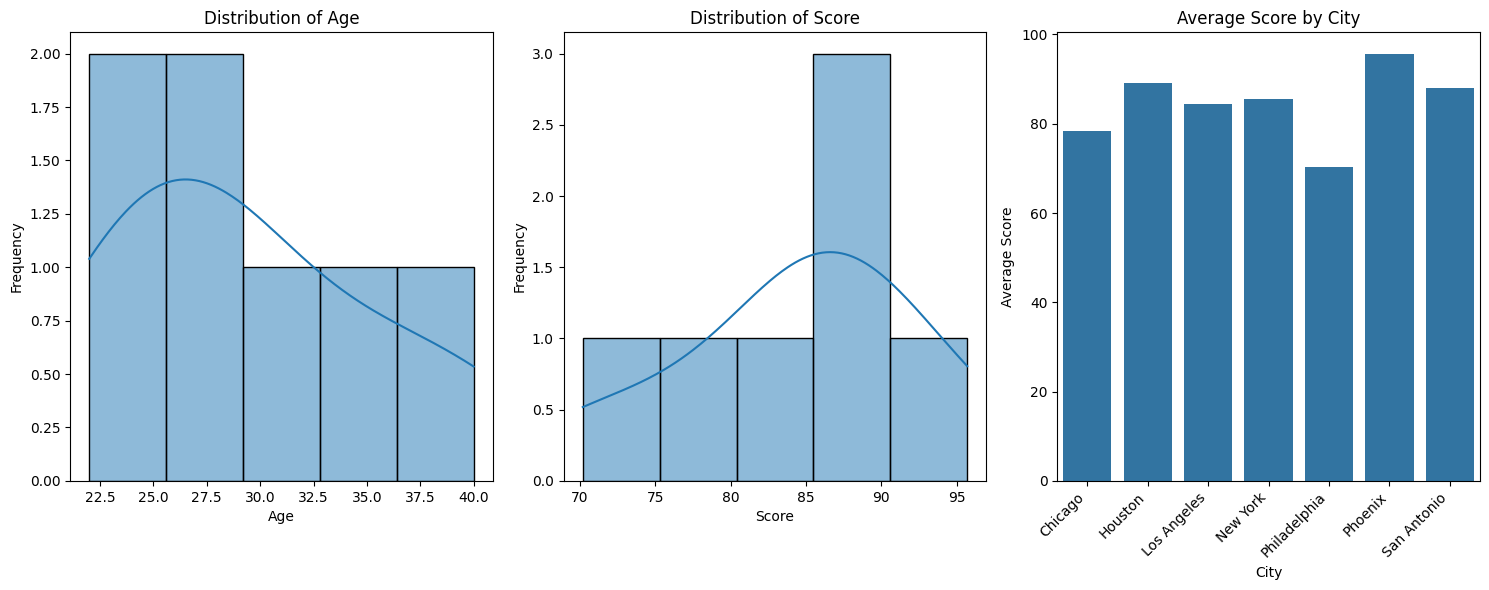

In [22]:
plt.figure(figsize=(15, 6))

# 1. Histogram for 'Age'
plt.subplot(1, 3, 1) # 1 row, 3 columns, first plot
sns.histplot(df['Age'], kde=True, bins=5)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Histogram for 'Score'
plt.subplot(1, 3, 2) # 1 row, 3 columns, second plot
sns.histplot(df['Score'], kde=True, bins=5)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')

# 3. Bar chart for average 'Score' by 'City'
plt.subplot(1, 3, 3) # 1 row, 3 columns, third plot
avg_score_by_city = df.groupby('City')['Score'].mean().reset_index()
sns.barplot(x='City', y='Score', data=avg_score_by_city)
plt.title('Average Score by City')
plt.xlabel('City')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the insights gained from the data analysis, including any patterns, trends, or interesting observations.


## Summary:

### Data Analysis Key Findings

*   **Dataset Overview**: A sample DataFrame was created with 7 entries and 4 columns: 'Name' (object/string), 'Age' (int64, then converted to float64), 'Score' (float64), and 'City' (object/string).
*   **Data Quality**:
    *   Initially, the dataset had no missing values.
    *   During cleaning, a missing value was introduced in the 'Score' column, which was then imputed using the mean score of approximately 84.47.
    *   A duplicate row was introduced and subsequently removed, restoring the DataFrame to its original 7 unique entries.
*   **Numerical Data Statistics**:
    *   **Age**: Ranges from 22 to 40 years, with a mean of approximately 29.29 and a median of 28.00.
    *   **Score**: Ranges from 70.20 to 95.70, with a mean of approximately 84.47 and a median of 85.50.
*   **City-Specific Patterns**:
    *   The dataset contains 7 unique cities, with one entry per city.
    *   Phoenix shows the highest average score (95.70) with an average age of 28.0.
    *   Philadelphia exhibits the lowest average score (70.20) but the highest average age (40.0).
    *   Chicago has the lowest average age (22.0) with an average score of 78.30.
*   **Visualizations**: Histograms were generated to visualize the distributions of 'Age' and 'Score', and a bar chart displayed the average 'Score' by 'City', reinforcing the city-specific performance differences.

### Insights or Next Steps

*   There appears to be a notable variation in average scores across different cities, with Phoenix performing highest and Philadelphia lowest. This suggests potential geographical or contextual factors influencing performance that warrant further investigation.
*   Further analysis could involve exploring the correlation between age and score, or incorporating additional features (if available) such as educational background or experience, to build a predictive model for score based on individual attributes and city.
